# Deep Learning Essentials

### Regression with Deep Lerning:

#### Preprocessing
Data preparation:

1. Load data into a pandas dataframe
2. Scale the feature dataset
3. Split into training and test datasets

In [1]:
# Import necessary libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets, preprocessing
import tensorflow as tf
import numpy as np

In [2]:
# Retrieve one of the built-in data set in scikit-learn library:
diabeties_dict = datasets.load_diabetes() # Returns a dictionary

# Put the data in a DataFrame:
diabeties_df = pd.DataFrame(data = diabeties_dict.data, columns = diabeties_dict.feature_names)
diabeties_df['target'] = diabeties_dict['target']

In [3]:
# Check out the data:
# Features: 10 baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained.
# Target: quantitative measure of disease progression one year after baseline.
# Details on data set is available here: https://scikit-learn.org/stable/datasets
diabeties_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# Split the features and target labels as X and Y data:
X = diabeties_df.drop('target', axis = 1)
y = diabeties_df['target']

In [5]:
# Split the dataset into training and testing data. 20% of the data is kept as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### Create the Deep Neural Network model:
Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss function and accuracy measurements

In [6]:
# Creating the model and fitting it to the training data:

# This is a sequential neural network with 5 layers:
# Different types of activation functions are available: https://en.wikipedia.org/wiki/Activation_function
# We'll use here RELU.

# Create a sequencial model in Keras:
model = tf.keras.models.Sequential()

# Add the input layer:
model.add(tf.keras.layers.Input(shape=(10,)))

# Add the first hidden layer:
model.add(tf.keras.layers.Dense(16,                      # Number of nodes
                                name='HL1',             # Layer name 
                                activation = 'relu'     # Activation function
                                ))

# Add the second hidden layer:
model.add(tf.keras.layers.Dense(16,
                                name='HL2',
                                activation = 'relu'
                                ))

# Add the third hidden layer:
model.add(tf.keras.layers.Dense(16,
                                name='HL3',
                                activation = 'relu'
                                ))

# Add an output layer:
model.add(tf.keras.layers.Dense(1,                      # Single output node for the single target variable
                             name='OutputLayer',
                             activation='relu'       
                             ))

In [7]:
# Compile the model
model.compile(optimizer = 'rmsprop', 
              loss = 'mse',
              metrics=['root_mean_squared_error'])

# Print the model details:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                     │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL3 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

#### Train and evaluate the model:

In [8]:
#Make it verbose so we can see the progress
VERBOSE = 1
#Set Batch size
BATCH_SIZE = 5
#Set number of epochs
EPOCHS = 25
#Set 20% of the training data to be used for validation after each epoch
VALIDATION_SPLIT = 0.2

history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT
          )


# Fit the model to training data and evaluate performance:
# model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 200)

Epoch 1/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28965.9453 - root_mean_squared_error: 170.0479 - val_loss: 29140.2598 - val_root_mean_squared_error: 170.7052
Epoch 2/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 28274.8242 - root_mean_squared_error: 168.0900 - val_loss: 28596.0176 - val_root_mean_squared_error: 169.1036
Epoch 3/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 28648.4043 - root_mean_squared_error: 169.0380 - val_loss: 27413.8203 - val_root_mean_squared_error: 165.5712
Epoch 4/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24407.5547 - root_mean_squared_error: 156.1125 - val_loss: 25207.0508 - val_root_mean_squared_error: 158.7673
Epoch 5/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24599.8926 - root_mean_squared_error: 156.2850 - val_loss: 21772.9199 - val_root_mean_squared_error: 147.5565
Epoch 6/25
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21671.9961 - root_mean_squared_error: 147.0717 - val_loss: 17421.8008 - val_root_mean_squared_erro

In [9]:
# Put the results in a DataFrame:
results_df = pd.DataFrame(history.history)
results_df.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,27933.509766,167.133209,29140.259766,170.705185
1,27610.855469,166.165146,28596.017578,169.103577
2,26820.529297,163.769745,27413.820312,165.571198
3,25225.304688,158.824768,25207.050781,158.767288
4,22588.984375,150.296326,21772.919922,147.556503


Text(0.5, 0, 'Epochs')

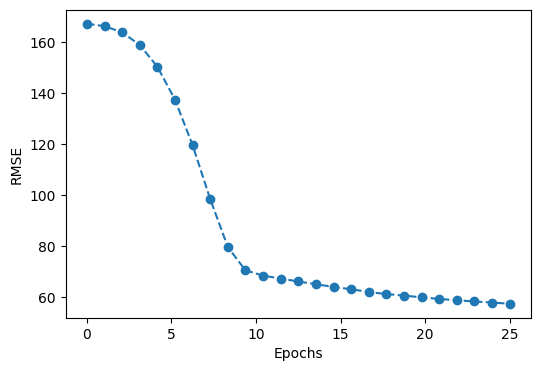

In [10]:
# plot the accuracy over epocs:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
plt.plot(np.linspace(0,EPOCHS,EPOCHS), results_df['root_mean_squared_error'], '--o')
plt.ylabel('RMSE')
plt.xlabel('Epochs')

In [11]:
# Ecaluate the model performance on test data:
model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3933.1812 - root_mean_squared_error: 62.6961 


[4070.822265625, 63.80299758911133]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0, 0.5, 'Predicted target data')

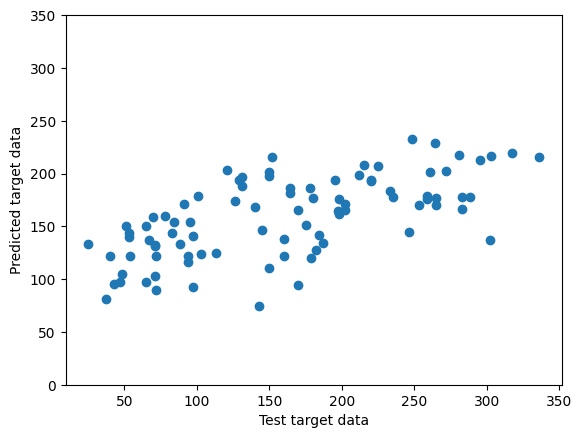

In [12]:
# Testing the model:
predictions = model.predict(X_test)
plt.figure()
plt.scatter(y_test,predictions)
plt.ylim([0, 350])
plt.xlabel("Test target data")
plt.ylabel("Predicted target data")

### Save (and load) the model:

In [13]:
#Saving a model
model.save("DNN_diabeties_regression.keras")
    
#Loading a Model 
loaded_model = tf.keras.models.load_model("DNN_diabeties_regression.keras")

#Print Model Summary
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HL1 (Dense)                     │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL2 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL3 (Dense)                     │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,476 (5.77 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 739 (2.89 KB)